# Recurrent Neural Network (RNN)
Sentiment analysis on the IMDb movie reviews dataset. This task involves classifying movie reviews as positive or negative based on their textual content.

**遞歸神經網路（Recurrent Neural Network, RNN）** 是一種設計用於處理序列數據的人工神經網路。RNN 的特點是輸出的結果不僅取決於當前的輸入，還取決於之前的輸入，這使得它特別適合處理時間序列或連續性數據，例如語言建模、語音識別和時間序列預測。

### 主要特點
1. **序列處理**：RNN 通過隱藏狀態（hidden state）來保留序列的上下文信息。隱藏狀態會根據當前輸入和之前的隱藏狀態進行更新，從而捕捉序列的依賴關係。

2. **權重共享**：與前饋神經網路（Feedforward Neural Network）不同，RNN 在不同的時間步驟之間共享權重，這大大減少了參數數量並提升了學習時間序列模式的能力。

3. **時間反向傳播（Backpropagation Through Time, BPTT）**：RNN 的訓練過程涉及通過時間反向傳播誤差來調整權重，從而使網路能夠學習時間上的依賴性。

4. **應用場景**：
   - 自然語言處理（NLP）：機器翻譯、情感分析、文本生成等。
   - 時間序列分析：股票價格預測、天氣預測。
   - 語音識別：將語音轉換為文字。

### 挑戰
- **梯度消失/爆炸問題**：RNN 在處理長期依賴時，可能因梯度的消失或爆炸而難以學習。
- **過擬合**：對於小型數據集，RNN 容易過擬合。

為了解決這些挑戰，誕生了如長短期記憶（LSTM）和門控遞歸單元（GRU）等改進型架構，它們加入了機制來保留重要信息並忘記不相關數據，特別適合處理長序列數據。

In [5]:
import torch
"""
This script checks for the availability of CUDA and MPS (Metal Performance Shaders) backends in PyTorch.

- If CUDA is available, it prints "CUDA is available."
- If CUDA is not available but MPS backend is available, it prints "MPS backend is available."
- If neither CUDA nor MPS backend is available, it prints "MPS backend is not available."

Requirements:
- PyTorch library must be installed.
- A CUDA-capable GPU or an Apple device with MPS support is required to test the respective backends.
"""

if torch.cuda.is_available():
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    print("MPS backend is available.")
else:
    print("MPS backend is not available.")

MPS backend is available.


## glorot kernel initalizer

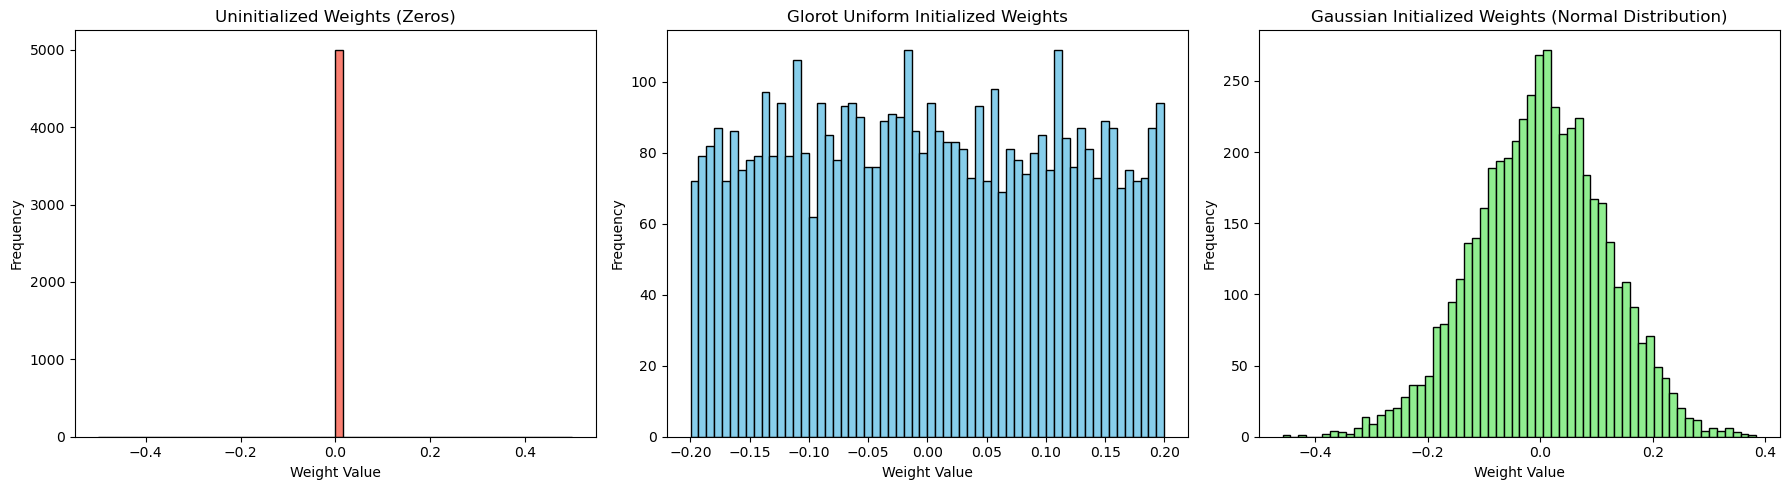

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the shape of the weight tensor (e.g., for a layer with 100 inputs and 50 outputs)
input_dim = 100
output_dim = 50
shape = (input_dim, output_dim)

# Step 1: Generate uninitialized weights (zeros)
uninitialized_weights = tf.Variable(tf.zeros(shape))

# Step 2: Initialize weights using Glorot Uniform
glorot_initializer = tf.keras.initializers.GlorotUniform()
# glorot_initializer = tf.keras.initializers.Orthogonal()
# glorot_initializer = tf.keras.initializers.Constant()
# glorot_initializer = tf.keras.initializers.Identity()
# glorot_initializer = tf.keras.initializers.IdentityInitializer()
# glorot_initializer = tf.keras.initializers.GlorotNormal()
glorot_initialized_weights = glorot_initializer(shape=shape)

# Step 3: Initialize weights using Gaussian (normal) distribution
# Set standard deviation based on shape for a fair comparison
stddev = np.sqrt(2.0 / (input_dim + output_dim))  # Similar to He initialization for Gaussian
gaussian_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=stddev)
gaussian_initialized_weights = gaussian_initializer(shape=shape)

# Convert weights to numpy arrays and flatten for visualization
uninitialized_weights_np = uninitialized_weights.numpy().flatten()
glorot_initialized_weights_np = glorot_initialized_weights.numpy().flatten()
gaussian_initialized_weights_np = gaussian_initialized_weights.numpy().flatten()

# Plot the distributions
plt.figure(figsize=(18, 5))

# Plot uninitialized weights
plt.subplot(1, 3, 1)
plt.hist(uninitialized_weights_np, bins=60, color='salmon', edgecolor='black')
plt.title("Uninitialized Weights (Zeros)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

# Plot Glorot Uniform initialized weights
plt.subplot(1, 3, 2)
plt.hist(glorot_initialized_weights_np, bins=60, color='skyblue', edgecolor='black')
plt.title("Glorot Uniform Initialized Weights")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

# Plot Gaussian (Normal) initialized weights
plt.subplot(1, 3, 3)
plt.hist(gaussian_initialized_weights_np, bins=60, color='lightgreen', edgecolor='black')
plt.title("Gaussian Initialized Weights (Normal Distribution)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## Fundamentals of Tensorflow for RNN 

/opt/homebrew/Caskroom/miniconda/base/envs/113_Python/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


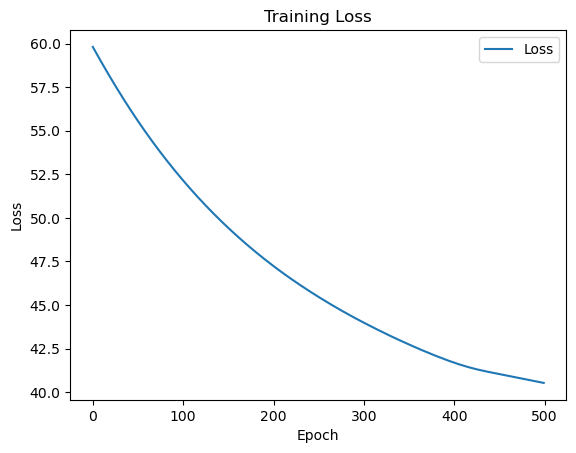

np.array([5]) = [5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
(1, 1, 1)
test input: [[[5]]] => Predicted next value after 5: 0.475768119096756


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Sample data: input and target sequences
x_train = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], dtype=np.float32).reshape(-1, 1, 1)
y_train = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], dtype=np.float32).reshape(-1, 1, 1)
# print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN( units=2, 
                                input_shape=(None, 1), 
                                activation="relu", 
                                return_sequences=True),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model and store the history
epochs = 500
history = model.fit(x_train, y_train, epochs=epochs, verbose=0)

# Plot the training loss
def plot_training_history(history):
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function to plot
plot_training_history(history)

# Test the model by predicting the next value in the sequence
print(f"np.array([5]) = {np.array([5])}")
test_input = np.array([5]).reshape(1, 1, 1)  # Next in sequence after 4 is expected to be close to 5
predicted_next_value = model.predict(test_input)
print(predicted_next_value.shape)
print(f"test input: {test_input} => Predicted next value after 5: {predicted_next_value[0,0,0]}")


In [4]:
import tensorflow as tf
import numpy as np

# Generate some simple sequential data
def generate_data(seq_length=10):
    x = np.array([i for i in range(seq_length)], dtype=np.float32)
    y = np.roll(x, shift=-1)  # target is the next value in sequence
    return x[:-1].reshape(1, -1, 1), y[:-1].reshape(1, -1, 1)

# Create training data
seq_length = 10
x_train, y_train = generate_data(seq_length)

# Define an RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=50, input_shape=(None, 1), activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=200, verbose=0)

# Test the model by predicting the next value in the sequence
test_seq = np.array([[seq_length]], dtype=np.float32).reshape(1, 1, 1)
predicted_next_value = model.predict(test_seq)

print(f"Predicted next value: {predicted_next_value}")


2024-11-09 16:11:45.621659: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-11-09 16:11:45.621754: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-09 16:11:45.621778: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-09 16:11:45.622108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-09 16:11:45.622128: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniconda/base/envs/113_Python/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted next value: [[1.9325699]]


## Regularizer (正則化)
在深度學習中的 **遞歸神經網路（RNN）**，**正則化（Regularizer）** 的主要功能是透過對模型的複雜度進行懲罰，來防止過擬合（Overfitting）。正則化會在訓練過程中加入懲罰項至損失函數，鼓勵模型學習更簡單的表示，從而在未見數據上具有更好的泛化能力。

### RNN 中正則化的主要功能
1. **控制過擬合**：
   - RNN 的參數量通常較大，特別是在時間步驟較多的情況下，容易發生過擬合。正則化透過在損失函數中加入懲罰項來約束權重的大小或範圍，從而降低過擬合的風險。

2. **促進模型簡單化**：
   - 正則化限制權重的值，鼓勵模型學習更簡單的模式，減少模型過於依賴訓練數據中的噪聲。

3. **防止權重爆炸**：
   - RNN 在訓練過程中可能因為梯度爆炸問題導致不穩定，而正則化可以限制權重的大小，緩解這種風險。

---

### 常見的 RNN 正則化方法
1. **L1 正則化**：
   - 在損失函數中加入權重的絕對值作為懲罰項。
   - 鼓勵稀疏性（Sparse Representation），有助於使部分權重值變為零。
   - 損失函數形式：  
     $$L = L_{\text{original}} + \lambda \sum |w|$$

2. **L2 正則化**：
   - 在損失函數中加入權重的平方和作為懲罰項。
   - 鼓勵權重較小但不強制設為零。
   - 損失函數形式：  
     $$L = L_{\text{original}} + \lambda \sum w^2$$
   - 又稱為 **Ridge Regression** 或 **Weight Decay**。

3. **Dropout**：
   - 隨機在訓練過程中將部分神經元的輸出置為零。
   - 防止神經元之間的過度協同作用，提升模型的泛化能力。
   - 在 RNN 中，變體如 **變分 Dropout（Variational Dropout）** 專為時間序列特性設計。

4. **Recurrent Dropout（遞歸 Dropout）**：
   - 專為 RNN 設計的 Dropout 方法，作用於遞歸連接上。
   - 特別適合捕捉時間依賴關係而不過擬合。

5. **Activity Regularization（激活正則化）**：
   - 對神經元的激活值進行懲罰。
   - 鼓勵網路保持較小的激活值，有助於穩定學習過程。

---

### 如何在 RNN 中加入正則化
以 Keras 框架為例，可以通過以下代碼為 RNN 層添加正則化：
```python
from tensorflow.keras import regularizers

# 在 RNN 層中加入 L2 正則化
rnn_layer = tf.keras.layers.SimpleRNN(
    units=64, 
    kernel_regularizer=regularizers.l2(0.01),  # 對權重矩陣進行 L2 正則化
    recurrent_regularizer=regularizers.l2(0.01)  # 對遞歸連接進行 L2 正則化
)
```

---

### 正則化的優點
1. **提升泛化能力**：減少訓練集與測試集之間的性能差距。
2. **穩定性**：防止過擬合及權重過大導致的訓練不穩定。
3. **小數據集上的優勢**：在數據量有限的情況下，正則化如 Dropout 能有效提升模型的穩健性。

# Airline Passenger dataset
A classic time series dataset that records the monthly totals of international airline passengers from 1949 to 1960.

[dataset source](https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv)

### Steps:
- Load Real-World Dataset: Use the Airline Passenger dataset.
- Preprocess the Data: Normalize and split into sequences.
- Build and Train the RNN: Predict the number of passengers.
- Visualize Predictions: Compare predictions with actual data.


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


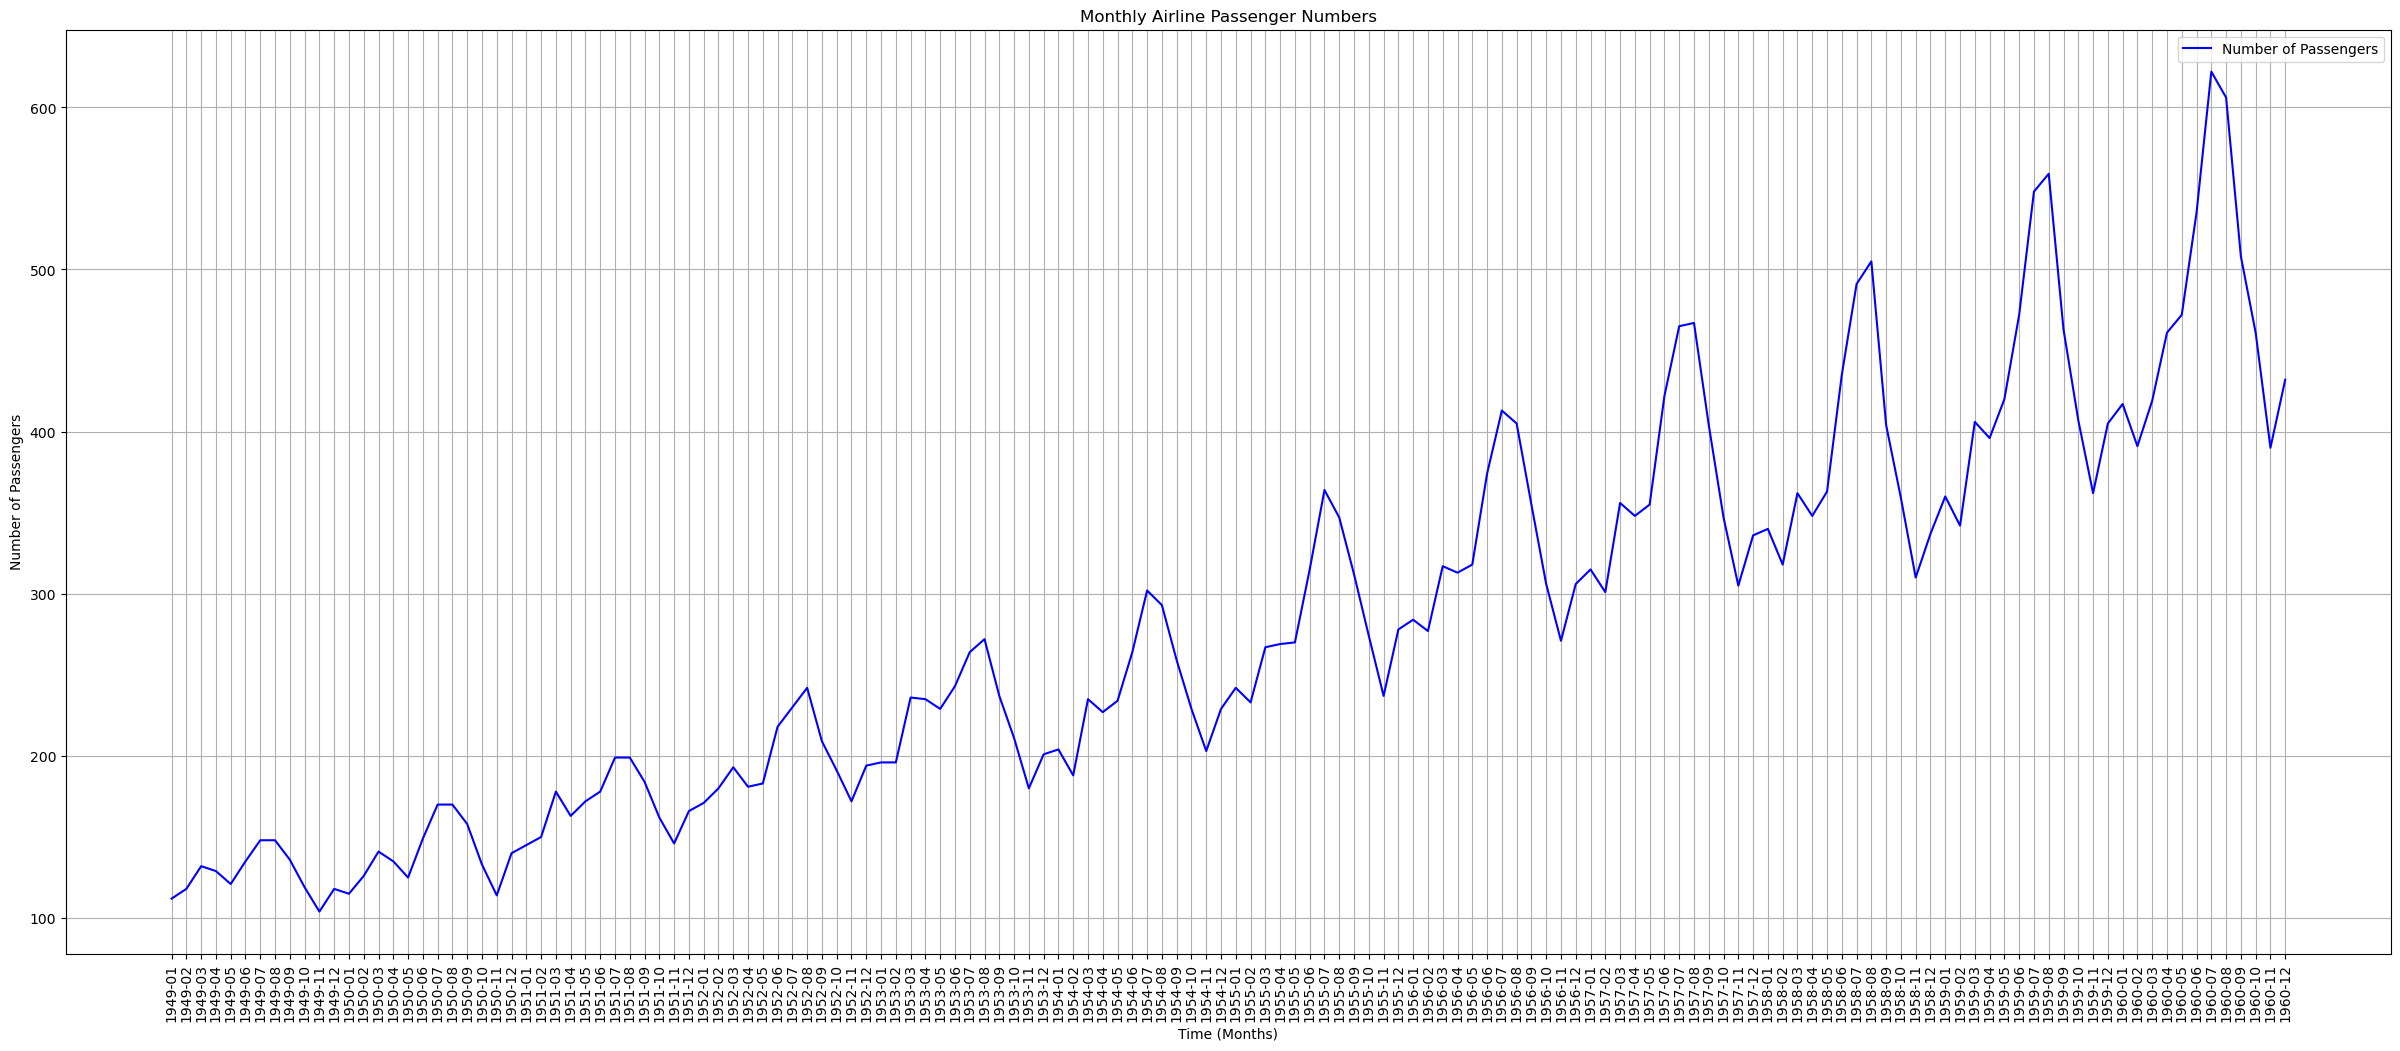

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = 'data/airline-passengers.csv'
data = pd.read_csv(file_path)

# Check the first few rows of the data
print(data.head())

# Plot the data
plt.figure(figsize=(30, 12))
plt.plot(data['Month'], data['Passengers'], label='Number of Passengers', color='blue')
plt.title("Monthly Airline Passenger Numbers")
plt.xlabel("Time (Months)")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()   

# Scalers

In Recurrent Neural Networks (RNNs), **scaling or normalizing data** is essential for stable training and improving model performance. Different scaling methods can be applied based on the nature of the data and the task. Here's an overview of commonly used scaler methods:

---

### 1. **Min-Max Scaling**
   - **Purpose**: Scales the data to a specific range, usually `[0, 1]`.
   - **Formula**:
     $$x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$$
   - **When to Use**:
     - When data needs to be in a specific bounded range (e.g., for sigmoid or tanh activation functions).
     - When the feature distribution is not Gaussian (non-normal).

   - **Implementation (Python)**:
     ```python
     from sklearn.preprocessing import MinMaxScaler

     scaler = MinMaxScaler(feature_range=(0, 1))
     scaled_data = scaler.fit_transform(data)
     ```

---

### 2. **Standardization (Z-Score Normalization)**
   - **Purpose**: Centers the data around 0 with a standard deviation of 1.
   - **Formula**:
     $$x_{\text{standardized}} = \frac{x - \mu}{\sigma}$$
     where $\mu$ is the mean and $\sigma$ is the standard deviation.
   - **When to Use**:
     - When the model assumes normally distributed data (e.g., Gaussian distribution).
     - Useful for activation functions like ReLU.

   - **Implementation (Python)**:
     ```python
     from sklearn.preprocessing import StandardScaler

     scaler = StandardScaler()
     standardized_data = scaler.fit_transform(data)
     ```

---

### 3. **MaxAbs Scaling**
   - **Purpose**: Scales each feature to the range $[-1, 1]$ based on the maximum absolute value.
   - **Formula**:
     $$x_{\text{scaled}} = \frac{x}{|x_{\text{max}}|}$$
   - **When to Use**:
     - When data is already centered at 0 but needs to be scaled.
     - Suitable for sparse data (e.g., in NLP or recommender systems).

   - **Implementation (Python)**:
     ```python
     from sklearn.preprocessing import MaxAbsScaler

     scaler = MaxAbsScaler()
     scaled_data = scaler.fit_transform(data)
     ```

---

### 4. **Robust Scaling**
   - **Purpose**: Scales the data based on the median and interquartile range (IQR), making it robust to outliers.
   - **Formula**:
     $$x_{\text{scaled}} = \frac{x - \text{median}(x)}{\text{IQR}}$$
   - **When to Use**:
     - When the data contains significant outliers that could skew the scaling.

   - **Implementation (Python)**:
     ```python
     from sklearn.preprocessing import RobustScaler

     scaler = RobustScaler()
     scaled_data = scaler.fit_transform(data)
     ```

---

### 5. **Log Transformation**
   - **Purpose**: Transforms data to reduce skewness, particularly useful for datasets with a long tail.
   - **Formula**:
     $$x_{\text{transformed}} = \log(x + 1)$$
   - **When to Use**:
     - When the data has exponential growth or follows a power-law distribution.
     - For time-series data with rapidly increasing values.

   - **Implementation (Python)**:
     ```python
     import numpy as np

     log_transformed_data = np.log1p(data)
     ```

---

### 6. **Quantile Transformation**
   - **Purpose**: Transforms data to follow a uniform or normal distribution.
   - **When to Use**:
     - When normalizing data to follow a specific distribution is required.
     - Useful in certain statistical analyses.

   - **Implementation (Python)**:
     ```python
     from sklearn.preprocessing import QuantileTransformer

     scaler = QuantileTransformer(output_distribution='normal')
     scaled_data = scaler.fit_transform(data)
     ```

---

### 7. **L2 Normalization**
   - **Purpose**: Scales the data to ensure that the L2 norm (Euclidean norm) of each feature vector equals 1.
   - **Formula**:
     $$x_{\text{normalized}} = \frac{x}{\|x\|_2}$$
   - **When to Use**:
     - When input features should have unit norm, commonly used in text classification and NLP tasks.

   - **Implementation (Python)**:
     ```python
     from sklearn.preprocessing import Normalizer

     scaler = Normalizer(norm='l2')
     normalized_data = scaler.fit_transform(data)
     ```

---

### Choosing the Right Scaling Method:
- **Min-Max Scaling**: Best for bounded data or when using bounded activation functions like sigmoid or tanh.
- **Standardization**: Preferred for algorithms that assume Gaussian distribution or sensitive to magnitude (e.g., SVM, k-means).
- **Robust Scaling**: Best when data has outliers.
- **Log Transformation**: For exponential or long-tailed distributions.
- **Quantile Transformation**: When a specific output distribution is desired.
- **L2 Normalization**: For text data or feature vectors in NLP and computer vision.

Proper scaling can greatly influence the convergence and performance of RNNs and other deep learning models.

/opt/homebrew/Caskroom/miniconda/base/envs/113_Python/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0915 - val_loss: 0.2050
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0316 - val_loss: 0.0760
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0128 - val_loss: 0.0182
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0069 - val_loss: 0.0158
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0066 - val_loss: 0.0190
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0055 - val_loss: 0.0188
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0052 - val_loss: 0.0151
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0051 - val_loss: 0.0152
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0045 - val_loss: 0.0146
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0045 - val_loss: 0.0137
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0045 - val_loss: 0.0139
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0035 - val_loss: 0.0127
E

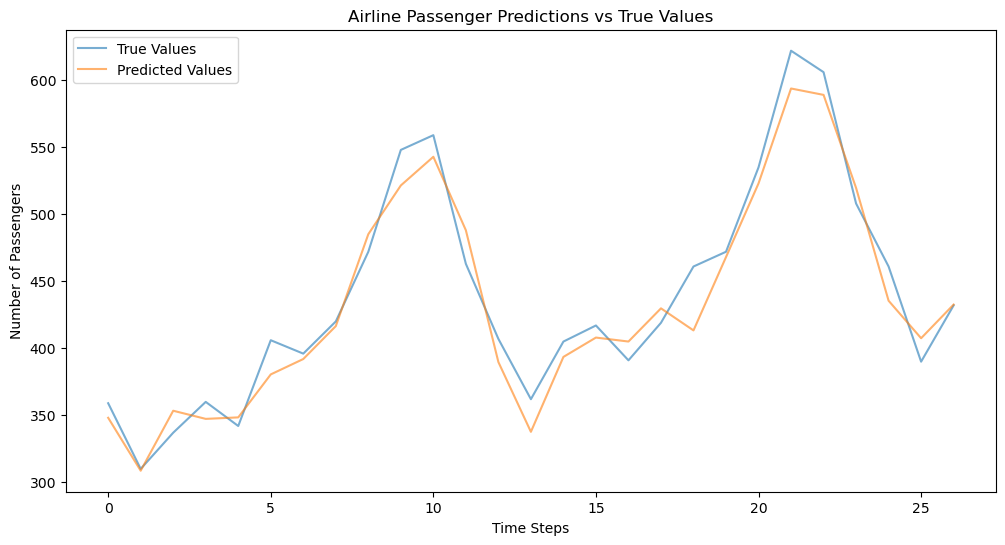

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Explore Dataset
data = pd.read_csv("data/airline-passengers.csv", usecols=[1])  # Load only the 'Passengers' column
data = data.values.astype(float)

# Step 2: Preprocess the Data
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize to [0, 1]
data_normalized = scaler.fit_transform(data)

# Create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Use 12 months to predict the next month
X, y = create_sequences(data_normalized, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 3: Build the RNN Model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),  # RNN layer with 50 units
    Dense(1)  # Output layer
])

model.compile(optimizer='adamw', loss='mse')
model.summary()

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Denormalize predictions and true values
y_test_denormalized = scaler.inverse_transform(y_test)
y_pred_denormalized = scaler.inverse_transform(y_pred)

# Step 6: Evaluate Model Performance
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
rmse = np.sqrt(mean_squared_error(y_test_denormalized, y_pred_denormalized))
r2 = r2_score(y_test_denormalized, y_pred_denormalized)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 7: Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_denormalized, label='True Values', alpha=0.6)
plt.plot(y_pred_denormalized, label='Predicted Values', alpha=0.6)
plt.legend()
plt.title("Airline Passenger Predictions vs True Values")
plt.xlabel("Time Steps")
plt.ylabel("Number of Passengers")
plt.show()


## Fundamentals of PyTorch for RNN

In [6]:
import torch
import torch.nn as nn
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(0)

# Generate simple sequential data
def generate_data(seq_length=10):
    x = np.array([i for i in range(seq_length)], dtype=np.float32)
    y = np.roll(x, shift=-1)  # target is the next value in sequence
    return x[:-1].reshape(-1, 1, 1), y[:-1].reshape(-1, 1, 1)

# Create training data
seq_length = 10
x_train, y_train = generate_data(seq_length)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# Define the RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)  # Get output and hidden state from RNN
        out = self.fc(out)    # Pass through a fully connected layer
        return out

# Initialize model, define loss and optimizer
model = SimpleRNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()    # Clear gradients for this training step
    output = model(x_train)  # Forward pass
    loss = criterion(output, y_train)  # Compute loss
    loss.backward()          # Backpropagation
    optimizer.step()         # Apply gradient descent

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Test the model by predicting the next value in the sequence
model.eval()
test_seq = torch.tensor([[[seq_length]]], dtype=torch.float32)
predicted_next_value = model(test_seq)

print(f"Predicted next value: {predicted_next_value.item()}")


Epoch [20/200], Loss: 2.2296
Epoch [40/200], Loss: 0.8748
Epoch [60/200], Loss: 0.2891
Epoch [80/200], Loss: 0.2160
Epoch [100/200], Loss: 0.1579
Epoch [120/200], Loss: 0.1209
Epoch [140/200], Loss: 0.0951
Epoch [160/200], Loss: 0.0765
Epoch [180/200], Loss: 0.0627
Epoch [200/200], Loss: 0.0521
Predicted next value: 9.62148380279541


### Dataset Overview:
The IMDb dataset comprises 50,000 movie reviews, evenly split between positive and negative sentiments. For this example, we'll utilize the dataset available through TensorFlow Datasets, which simplifies data loading and preprocessing.

In [ ]:
#Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
# Load the IMDb dataset
(train_data, test_data), info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Define constants
BUFFER_SIZE = 10000 # Buffer size for shuffling the dataset
BATCH_SIZE = 64 # Batch size
VOCAB_SIZE = 1000 # Vocabulary size
EMBEDDING_DIM = 64 # Embedding dimension
MAX_SEQUENCE_LENGTH = 500 # Maximum sequence length

# Prepare the training and testing datasets
train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
